In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Load dataset
df = pd.read_csv("Data_set 2.csv")

In [33]:
# Show first few rows
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [34]:
# Create a new DataFrame with relevant numeric columns
data = df[["age", "Mutual_Funds", "Equity_Market", "Debentures"]]

# Rename for easier plotting
data.columns = ["Age", "MutualFunds", "EquityMarket", "Debentures"]
data.head()

,Age,MutualFunds,EquityMarket,Debentures
0,34,1,2,5
1,23,4,3,2
2,30,3,6,4
3,22,2,1,3
4,24,2,1,3


In [35]:
# Calculate correlation coefficients
correlation = data.corr()
print(correlation)

                   Age  MutualFunds  EquityMarket  Debentures
Age           1.000000    -0.123914      0.246840    0.326638
MutualFunds  -0.123914     1.000000      0.332043   -0.351495
EquityMarket  0.246840     0.332043      1.000000   -0.016898
Debentures    0.326638    -0.351495     -0.016898    1.000000


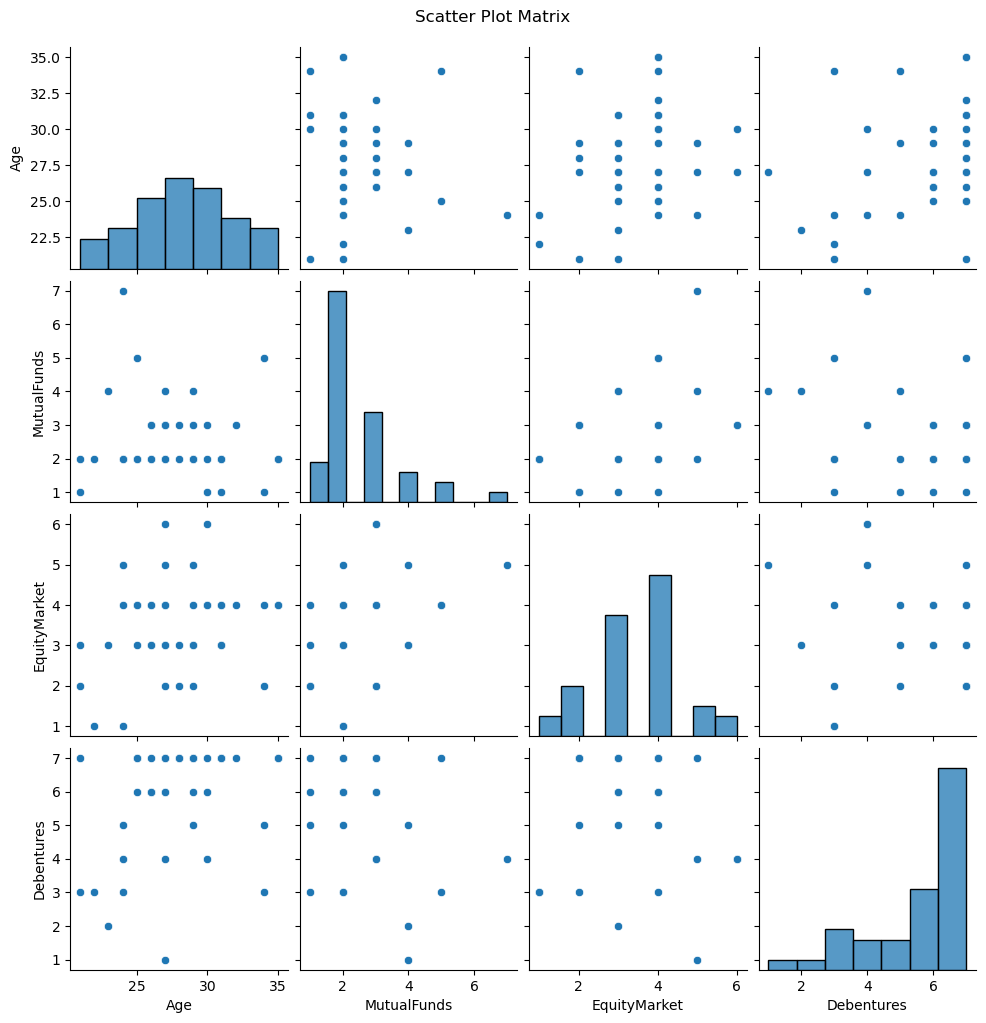

In [36]:
# Visualize with pairplot
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

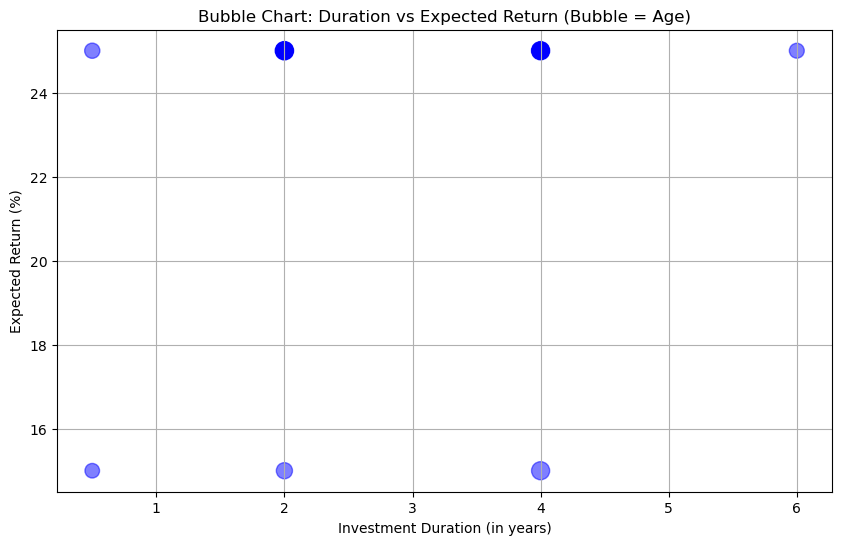

In [37]:
# Convert categorical data to numeric (for plotting)
df["Expected_Return"] = df["Expect"].map({"10%-20%": 15, "20%-30%": 25, "Above 30%": 35})
df["Investment_Years"] = df["Duration"].map({
    "Less than 1 year": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "More than 5 years": 6
})

# Bubble chart
plt.figure(figsize=(10,6))
plt.scatter(df["Investment_Years"], df["Expected_Return"], s=df["age"]*5, alpha=0.5, c='blue')
plt.xlabel("Investment Duration (in years)")
plt.ylabel("Expected Return (%)")
plt.title("Bubble Chart: Duration vs Expected Return (Bubble = Age)")
plt.grid(True)
plt.show()